## Private Construction Decomposition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Import Data 

In [2]:
dfPri = pd.read_csv('/Users/mariam/Documents/BUAD5112/Module 3/ConstructionTimeSeriesDataV2.csv')
dfPri = dfPri.set_index('Month')
dfPri.head()

,Month-Year,Total Construction,Private Construction,Public Construction
Month,,,,
1,Jan-02,59516,45273,14243
2,Feb-02,58588,44475,14113
3,Mar-02,63782,49396,14386
4,Apr-02,69504,53283,16221
5,May-02,73384,55009,18375


Plot Private Const. Data

Text(0, 0.5, 'Construction Costs (Dollars $)')

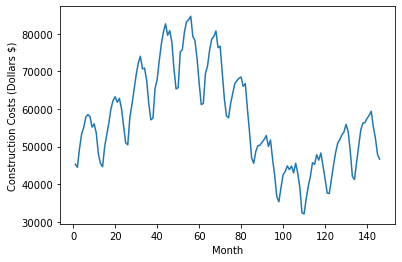

In [3]:
fig, ax = plt.subplots()

ax.plot(dfPri.index, dfPri['Private Construction'], label = 'Private Construction') #Plot Graph
ax.set_xlabel('Month')
ax.set_ylabel('Construction Costs (Dollars $)')

Average Squared Error per Month:  37395667.05489795
           Month-Year  Total Construction  Private Construction  \
2022-07-31     Jul-03               82971                 62216   
2022-08-31     Aug-03               85191                 63234   
2022-09-30     Sep-03               83841                 61767   
2022-10-31     Oct-03               83133                 62813   
2022-11-30     Nov-03               77915                 60115   
...               ...                 ...                   ...   
2031-04-30     Apr-12               66223                 44964   
2031-05-31     May-12               72240                 48342   
2031-06-30     Jun-12               77876                 50900   
2031-07-31     Jul-12               78897                 51794   
2031-08-31     Aug-12               81712                 53073   

            Public Construction        MovAvg         sqErr  
2022-07-31                20755  57969.430556  1.803335e+07  
2022-08-31         

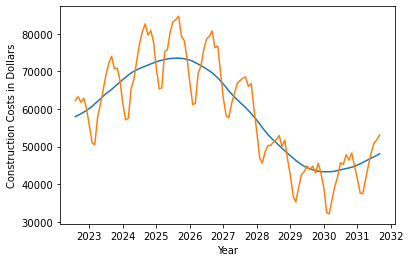

In [4]:
def sqErr(row):
    return(row['Private Construction'] - row['MovAvg'])**2

dfPri['MovAvg'] = np.NaN
dfPri['sqErr'] = np.NaN

dfPri.index = pd.date_range(freq = 'm', start = pd.Timestamp(year = 2021, month = 1, day = 2), periods = len(dfPri['Private Construction']))

window = 36
window = window - window % 2

for i in range(int(window/2), dfPri.shape[0] - int(window/2)):
    dfPri.loc[dfPri.index[i], 'MovAvg'] = (.5 * dfPri.iloc[i - int(window/2)]['Private Construction'] + dfPri.iloc[i - int(window/2) + 1:i + int(window/2)]['Private Construction'].sum() + .5 * dfPri.iloc[i + int(window/2)]['Private Construction'])/float(window)

dfPri['sqErr'] = (dfPri['Private Construction'] - dfPri['MovAvg']) ** 2

dfPri.dropna(how = 'any', inplace = True)

fig, ax = plt.subplots()
ax.plot(dfPri['MovAvg'], label = 'Moving Average')
ax.plot(dfPri['Private Construction'], label = 'Private Construction')
ax.set_xlabel('Year')
ax.set_ylabel('Construction Costs in Dollars')

print('Average Squared Error per Month: ', sum(dfPri['sqErr'])/len(dfPri))
print(dfPri)

In [5]:
dfPri['R1'] = dfPri['Private Construction'] - dfPri['MovAvg']
dfPri['R1Error'] = abs((dfPri['Private Construction'] - dfPri['R1'])/dfPri['Private Construction'])
dfPri.style.format({
    'MovAvg': '{:.1f}'.format,
    'sqErr': '{:,.1f}'.format,
    'R1': '{:,.1f}'.format,
    'R1Error': '{:,.3f}'.format
})

,Month-Year,Total Construction,Private Construction,Public Construction,MovAvg,sqErr,R1,R1Error
2022-07-31 00:00:00,Jul-03,82971,62216,20755,57969.4,"18,033,352.0","4,246.6",0.932
2022-08-31 00:00:00,Aug-03,85191,63234,21957,58314.9,"24,197,107.6","4,919.1",0.922
2022-09-30 00:00:00,Sep-03,83841,61767,22075,58718.9,"9,290,896.7","3,048.1",0.951
2022-10-31 00:00:00,Oct-03,83133,62813,20321,59143.6,"13,464,822.5","3,669.4",0.942
2022-11-30 00:00:00,Nov-03,77915,60115,17801,59593.5,"271,918.8",521.5,0.991
2022-12-31 00:00:00,Dec-03,71050,55584,15466,60111.7,"20,500,394.3","-4,527.7",1.081
2023-01-31 00:00:00,Jan-04,64934,50975,13959,60687.3,"94,329,418.8","-9,712.3",1.191
2023-02-28 00:00:00,Feb-04,64138,50449,13689,61335.4,"118,514,067.8","-10,886.4",1.216
2023-03-31 00:00:00,Mar-04,73238,57796,15443,62017.4,"17,820,241.4","-4,221.4",1.073
2023-04-30 00:00:00,Apr-04,78354,61177,17177,62701.1,"2,322,787.7","-1,524.1",1.025


Average Residual:  113.25315656565621


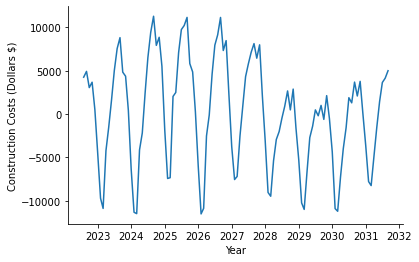

In [6]:
fig,ax = plt.subplots()

ax.plot(dfPri['R1'])
ax.set_xlabel('Year')
ax.set_ylabel('Construction Costs (Dollars $)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

print('Average Residual: ', sum(dfPri['R1'])/len(dfPri))

In [7]:
maxCor = 0.0
period = np.NaN

for i in range(1,37):
    cor = dfPri['R1'].autocorr(lag = i)
    print('Correlation of lag ',i,'   ',cor)
    if cor > maxCor:
        maxCor = cor
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCor)

Correlation of lag  1     0.8250475036301713
Correlation of lag  2     0.4820939752221447
Correlation of lag  3     0.0661838628463355
Correlation of lag  4     -0.29310582259154694
Correlation of lag  5     -0.5386625150984725
Correlation of lag  6     -0.6496282831082484
Correlation of lag  7     -0.549838477475518
Correlation of lag  8     -0.3185413831731613
Correlation of lag  9     0.02011606382325631
Correlation of lag  10     0.41176952584284515
Correlation of lag  11     0.7322731003955263
Correlation of lag  12     0.8944851710984221
Correlation of lag  13     0.7299213692607464
Correlation of lag  14     0.4055214152186815
Correlation of lag  15     0.0031237974667481893
Correlation of lag  16     -0.34159925855108353
Correlation of lag  17     -0.5745510163732713
Correlation of lag  18     -0.681216824190257
Correlation of lag  19     -0.5902172854543253
Correlation of lag  20     -0.37531995989940625
Correlation of lag  21     -0.04750388422754723
Correlation of lag  22   

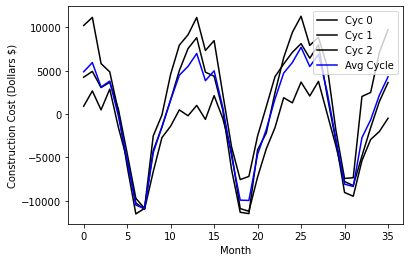

In [8]:
per = 36
cyclen = per
numcyc = int(len(dfPri)/ cyclen + .5)
cyc = [dfPri.iloc[range(i * per, min((i + 1) * per, len(dfPri)))]['R1'] for i in range(numcyc)]
ptcyc = [dfPri.iloc[range(i, len(dfPri['R1']), per)]['R1'].tolist() for i in range(per)]
avg = [sum(pt)/len(pt) for pt in ptcyc]

fig, ax = plt.subplots()

for i in range(len(cyc)):
    ax.plot(cyc[i].values,label = 'Cyc '+str(i), c = 'k')
ax.plot(avg, label = 'Avg Cycle', c = 'b')
ax.set_xlabel('Month')
ax.set_ylabel('Construction Cost (Dollars $)')


ax.legend()


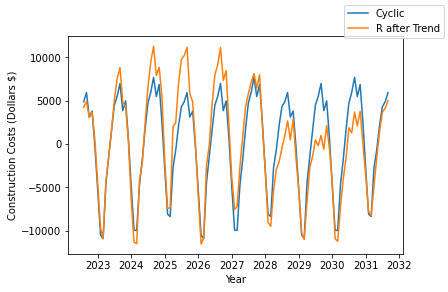

In [9]:
cyclen = per
numcyc = int(len(dfPri)/cyclen + .5)
dfPri['C'] = np.NaN

for i in range(len(dfPri)):
    dfPri.loc[dfPri.index[i], 'C'] = avg[i % cyclen]
    
fig, ax = plt.subplots()

ax.plot(dfPri['C'], label = 'Cyclic')
ax.plot(dfPri['R1'], label = 'R after Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Construction Costs (Dollars $)')

fig.legend()

Avg Error:  0.03413530995211107
           Month-Year  Total Construction  Private Construction  \
2022-07-31     Jul-03               82971                 62216   
2022-08-31     Aug-03               85191                 63234   
2022-09-30     Sep-03               83841                 61767   
2022-10-31     Oct-03               83133                 62813   
2022-11-30     Nov-03               77915                 60115   
...               ...                 ...                   ...   
2031-04-30     Apr-12               66223                 44964   
2031-05-31     May-12               72240                 48342   
2031-06-30     Jun-12               77876                 50900   
2031-07-31     Jul-12               78897                 51794   
2031-08-31     Aug-12               81712                 53073   

            Public Construction        MovAvg           R1   R1Error  \
2022-07-31                20755  57969.430556  4246.569444  0.931745   
2022-08-31         

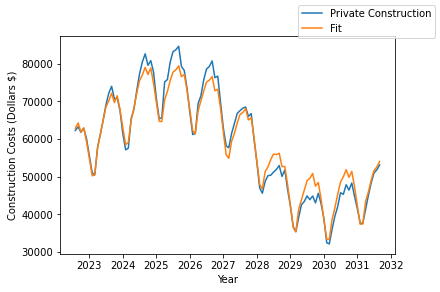

In [10]:
dfPri['R2X'] = dfPri['R1'] - dfPri['C']
dfPri['R2ErrorX'] = abs(dfPri['R2X']/dfPri['Private Construction'])
dfPri['Fit'] = dfPri['MovAvg'] + dfPri['C']
dfPri.drop(['sqErr'], axis =1, inplace = True)
print('Avg Error: ', sum(dfPri['R2ErrorX'])/len(dfPri))
print(dfPri)

fig, ax = plt.subplots()

ax.plot(dfPri['Private Construction'], label = 'Private Construction')
ax.plot(dfPri['Fit'], label = 'Fit')
ax.set_xlabel('Year')
ax.set_ylabel('Construction Costs (Dollars $)')

fig.legend()

Correlation of lag  1     0.8987335001671184
Correlation of lag  2     0.7923905141951393
Correlation of lag  3     0.6535273174355425
Correlation of lag  4     0.5367098414134732
Correlation of lag  5     0.4191330549233182
Correlation of lag  6     0.3666764746845794
Correlation of lag  7     0.3610932006696376
Correlation of lag  8     0.4048474963933511
Correlation of lag  9     0.4407764592444557
Correlation of lag  10     0.4984676558799334
Correlation of lag  11     0.5423181590555519
Correlation of lag  12     0.5829814475094192
Correlation of lag  13     0.5243907247981944
Correlation of lag  14     0.48037943288046386
Correlation of lag  15     0.3735602385077335
Correlation of lag  16     0.29380278720304254
Correlation of lag  17     0.21102141188594273
Correlation of lag  18     0.1844077438001213
Correlation of lag  19     0.188631361664408
Correlation of lag  20     0.20791164970018494
Correlation of lag  21     0.21582616688447312
Correlation of lag  22     0.2285917578

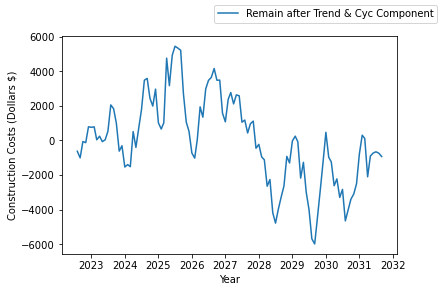

In [11]:
fig, ax = plt.subplots()

ax.plot(dfPri['R2X'], label = 'Remain after Trend & Cyc Component')
ax.set_xlabel('Year')
ax.set_ylabel('Construction Costs (Dollars $)')

fig.legend()

maxcor = 0
per = np.NaN

for i in range(1,37):
    cor = dfPri['R2X'].autocorr(lag = i)
    print('Correlation of lag ', i, '   ', cor)
    if cor > maxcor:
        per = i 
print('Period = ',per, '    Max Correlation = ', maxcor)

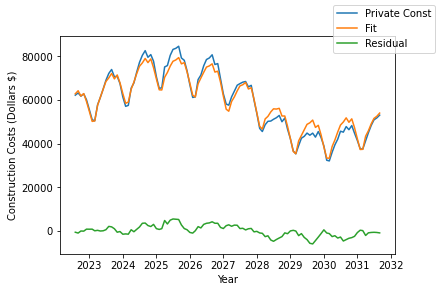

In [13]:
fig, ax = plt.subplots()

ax.plot(dfPri['Private Construction'], label = 'Private Const')
ax.plot(dfPri['Fit'], label = 'Fit')
ax.plot(dfPri['R2X'], label = 'Residual')
ax.set_xlabel('Year')
ax.set_ylabel('Construction Costs (Dollars $)')

fig.legend()


## Public Construction Decomposition

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [17]:
dfPub = pd.read_csv('/Users/mariam/Documents/BUAD5112/Module 3/ConstructionTimeSeriesDataV2.csv')
dfPub = dfPub.set_index('Month')
dfPub.head()

,Month-Year,Total Construction,Private Construction,Public Construction
Month,,,,
1,Jan-02,59516,45273,14243
2,Feb-02,58588,44475,14113
3,Mar-02,63782,49396,14386
4,Apr-02,69504,53283,16221
5,May-02,73384,55009,18375


Text(0, 0.5, 'Construction Costs (Dollars $)')

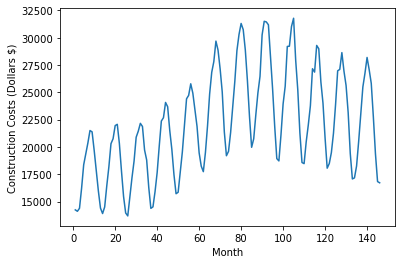

In [16]:
fig, ax = plt.subplots()

ax.plot(dfPub.index, dfPub['Public Construction'], label = 'Public Construction') #Plot Graph
ax.set_xlabel('Month')
ax.set_ylabel('Construction Costs (Dollars $)')

Average Squared Error per Month:  13581548.10100133
           Month-Year  Total Construction  Private Construction  \
2022-07-31     Jul-03               82971                 62216   
2022-08-31     Aug-03               85191                 63234   
2022-09-30     Sep-03               83841                 61767   
2022-10-31     Oct-03               83133                 62813   
2022-11-30     Nov-03               77915                 60115   
...               ...                 ...                   ...   
2031-04-30     Apr-12               66223                 44964   
2031-05-31     May-12               72240                 48342   
2031-06-30     Jun-12               77876                 50900   
2031-07-31     Jul-12               78897                 51794   
2031-08-31     Aug-12               81712                 53073   

            Public Construction        MovAvg         sqErr  
2022-07-31                20755  18050.486111  7.314395e+06  
2022-08-31         

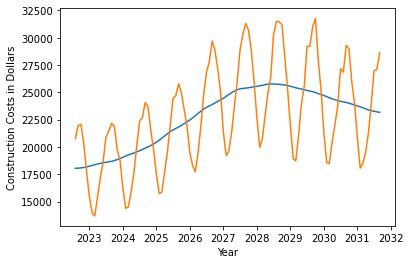

In [18]:
def sqErr(row):
    return(row['Public Construction'] - row['MovAvg']) ** 2

dfPub['MovAvg'] = np.NaN
dfPub['sqErr'] = np.NaN

dfPub.index = pd.date_range(freq = 'm', start = pd.Timestamp(year = 2021, month = 1, day = 2), periods = len(dfPub['Public Construction']))

window = 36
window = window - window % 2

for i in range(int(window/2), dfPub.shape[0] - int(window/2)):
    dfPub.loc[dfPub.index[i], 'MovAvg'] = (.5 * dfPub.iloc[i - int(window/2)]['Public Construction'] + dfPub.iloc[i - int(window/2) + 1:i + int(window/2)]['Public Construction'].sum() + .5 * dfPub.iloc[i + int(window/2)]['Public Construction'])/float(window)

dfPub['sqErr'] = (dfPub['Public Construction'] - dfPub['MovAvg']) ** 2

dfPub.dropna(how = 'any', inplace = True)

fig, ax = plt.subplots()

ax.plot(dfPub['MovAvg'], label = 'Moving Average')
ax.plot(dfPub['Public Construction'], label = 'Public Construction')
ax.set_xlabel('Year')
ax.set_ylabel('Construction Costs in Dollars')

print('Average Squared Error per Month: ', sum(dfPub['sqErr'])/len(dfPub))
print(dfPub)

In [19]:
dfPub['R1'] = dfPub['Public Construction'] - dfPub['MovAvg']
dfPub['R1Error'] = abs((dfPub['Public Construction'] - dfPub['R1'])/dfPub['Public Construction'])
dfPub.style.format({
    'MovAvg': '{:.1f}'.format,
    'sqErr': '{:,.1f}'.format,
    'R1': '{:,.1f}'.format,
    'R1Error': '{:,.3f}'.format
})

,Month-Year,Total Construction,Private Construction,Public Construction,MovAvg,sqErr,R1,R1Error
2022-07-31 00:00:00,Jul-03,82971,62216,20755,18050.5,"7,314,395.4","2,704.5",0.870
2022-08-31 00:00:00,Aug-03,85191,63234,21957,18058.0,"15,202,201.0","3,899.0",0.822
2022-09-30 00:00:00,Sep-03,83841,61767,22075,18084.9,"15,920,765.0","3,990.1",0.819
2022-10-31 00:00:00,Oct-03,83133,62813,20321,18126.2,"4,817,354.3","2,194.8",0.892
2022-11-30 00:00:00,Nov-03,77915,60115,17801,18170.0,"136,161.0",-369.0,1.021
2022-12-31 00:00:00,Dec-03,71050,55584,15466,18235.5,"7,670,130.2","-2,769.5",1.179
2023-01-31 00:00:00,Jan-04,64934,50975,13959,18309.2,"18,923,950.0","-4,350.2",1.312
2023-02-28 00:00:00,Feb-04,64138,50449,13689,18377.0,"21,976,953.3","-4,688.0",1.342
2023-03-31 00:00:00,Mar-04,73238,57796,15443,18444.6,"9,009,669.3","-3,001.6",1.194
2023-04-30 00:00:00,Apr-04,78354,61177,17177,18502.0,"1,755,625.0","-1,325.0",1.077


Average Residual:  120.58522727272724


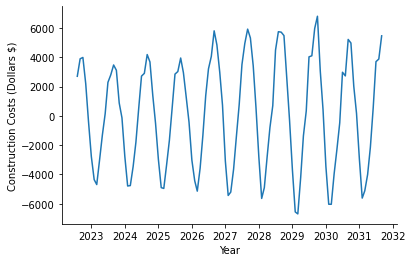

In [20]:
fig,ax = plt.subplots()

ax.plot(dfPub['R1'])
ax.set_xlabel('Year')
ax.set_ylabel('Construction Costs (Dollars $)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

print('Average Residual: ', sum(dfPub['R1'])/len(dfPub))

In [21]:
maxCor = 0.0
period = np.NaN

for i in range(1,37):
    cor = dfPub['R1'].autocorr(lag = i)
    print('Correlation of lag ',i,'   ',cor)
    if cor > maxCor:
        maxCor = cor
        period = i
print('Period = ',period,'     Maximum Correlation = ',maxCor)

Correlation of lag  1     0.8486375316894602
Correlation of lag  2     0.4846195337567183
Correlation of lag  3     -0.007177248780703143
Correlation of lag  4     -0.49554892375973447
Correlation of lag  5     -0.8288179569669593
Correlation of lag  6     -0.9462777407123573
Correlation of lag  7     -0.8288579638039721
Correlation of lag  8     -0.48571061970010343
Correlation of lag  9     0.004997098591155971
Correlation of lag  10     0.4817646196968951
Correlation of lag  11     0.8389178942275625
Correlation of lag  12     0.9802446550357118
Correlation of lag  13     0.8361843883266434
Correlation of lag  14     0.4848265284305894
Correlation of lag  15     -0.003592213269114516
Correlation of lag  16     -0.48222336701850393
Correlation of lag  17     -0.8171150144686051
Correlation of lag  18     -0.9427534781166457
Correlation of lag  19     -0.8337051906400711
Correlation of lag  20     -0.4961430024835644
Correlation of lag  21     -0.009858447978117565
Correlation of lag 

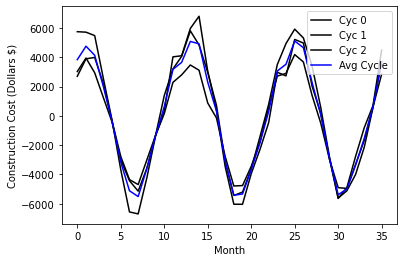

In [22]:
per = 36
cyclen = per
numcyc = int(len(dfPub)/ cyclen + .5)
cyc = [dfPub.iloc[range(i * per, min((i + 1) * per, len(dfPub)))]['R1'] for i in range(numcyc)]
ptcyc = [dfPub.iloc[range(i, len(dfPub['R1']), per)]['R1'].tolist() for i in range(per)]
avg = [sum(pt)/len(pt) for pt in ptcyc]


fig, ax = plt.subplots()

for i in range(len(cyc)):
    ax.plot(cyc[i].values,label = 'Cyc '+str(i), c = 'k')
ax.plot(avg, label = 'Avg Cycle', c = 'b')
ax.set_xlabel('Month')
ax.set_ylabel('Construction Cost (Dollars $)')

ax.legend()



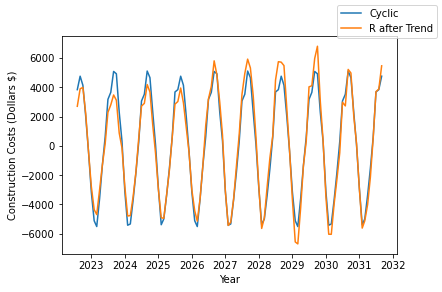

In [23]:
cyclen = per
numcyc = int(len(dfPub)/cyclen + .5)
dfPub['C'] = np.NaN

for i in range(len(dfPub)):
    dfPub.loc[dfPub.index[i], 'C'] = avg[i % cyclen]

fig, ax = plt.subplots()

ax.plot(dfPub['C'], label = 'Cyclic')
ax.plot(dfPub['R1'], label = 'R after Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Construction Costs (Dollars $)')

fig.legend()

Avg Error:  0.023224970271695
           Month-Year  Total Construction  Private Construction  \
2022-07-31     Jul-03               82971                 62216   
2022-08-31     Aug-03               85191                 63234   
2022-09-30     Sep-03               83841                 61767   
2022-10-31     Oct-03               83133                 62813   
2022-11-30     Nov-03               77915                 60115   
...               ...                 ...                   ...   
2031-04-30     Apr-12               66223                 44964   
2031-05-31     May-12               72240                 48342   
2031-06-30     Jun-12               77876                 50900   
2031-07-31     Jul-12               78897                 51794   
2031-08-31     Aug-12               81712                 53073   

            Public Construction        MovAvg           R1   R1Error  \
2022-07-31                20755  18050.486111  2704.513889  0.869693   
2022-08-31           

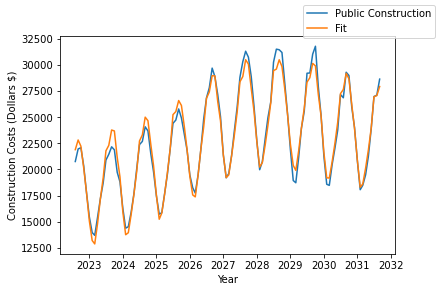

In [24]:
dfPub['R2X'] = dfPub['R1'] - dfPub['C']
dfPub['R2ErrorX'] = abs(dfPub['R2X']/dfPub['Public Construction'])
dfPub['Fit'] = dfPub['MovAvg'] + dfPub['C']
dfPub.drop(['sqErr'], axis =1, inplace = True)
print('Avg Error: ', sum(dfPub['R2ErrorX'])/len(dfPub))
print(dfPub)

fig, ax = plt.subplots()

ax.plot(dfPub['Public Construction'], label = 'Public Construction')
ax.plot(dfPub['Fit'], label = 'Fit')
ax.set_xlabel('Year')
ax.set_ylabel('Construction Costs (Dollars $)')

fig.legend()

Correlation of lag  1     0.7297837523638323
Correlation of lag  2     0.48528257816223996
Correlation of lag  3     0.25416895416047003
Correlation of lag  4     -0.056354886972488964
Correlation of lag  5     -0.2223369681213647
Correlation of lag  6     -0.322907388615984
Correlation of lag  7     -0.35840064006212274
Correlation of lag  8     -0.2183363504190699
Correlation of lag  9     0.04513200073134986
Correlation of lag  10     0.18561606964480742
Correlation of lag  11     0.4421789677665905
Correlation of lag  12     0.5737456465401485
Correlation of lag  13     0.45816619798833297
Correlation of lag  14     0.4499160484527294
Correlation of lag  15     0.21906468641111054
Correlation of lag  16     -0.008986356343827521
Correlation of lag  17     -0.12594745867986212
Correlation of lag  18     -0.24284285341100145
Correlation of lag  19     -0.29389097528719776
Correlation of lag  20     -0.19675336862764417
Correlation of lag  21     -0.09797992140346468
Correlation of la

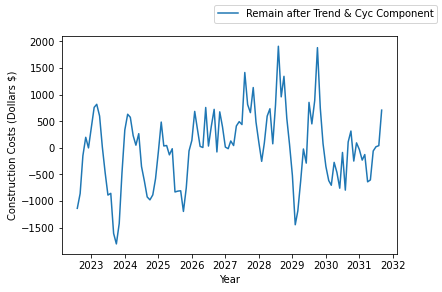

In [25]:
fig, ax = plt.subplots()

ax.plot(dfPub['R2X'], label = 'Remain after Trend & Cyc Component')
ax.set_xlabel('Year')
ax.set_ylabel('Construction Costs (Dollars $)')

fig.legend()

maxcor = 0
per = np.NaN

for i in range(1,37):
    cor = dfPub['R2X'].autocorr(lag = i)
    print('Correlation of lag ', i, '   ', cor)
    if cor > maxcor:
        per = i 
print('Period = ',per, '    Max Correlation = ', maxcor)

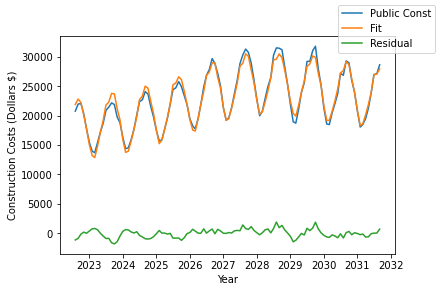

In [26]:
fig, ax = plt.subplots()

ax.plot(dfPub['Public Construction'], label = 'Public Const')
ax.plot(dfPub['Fit'], label = 'Fit')
ax.plot(dfPub['R2X'], label = 'Residual')
ax.set_xlabel('Year')
ax.set_ylabel('Construction Costs (Dollars $)')

fig.legend()